# Oscillation probability in vacuum

A $\texttt{Jupyter}$ notebook to show how the code by Denis Carabadjac is implemented.

Miscellaneous:


In [1]:
import sys

sys.path.append("../../..")

import numpy as np
from numpy import sin, cos, conj, tan, radians
from matplotlib import pyplot as plt
from matplotlib import rc
import src.nu_osc.osc_prob as prob
import src.nu_osc.default_parameters as param

<p> </p>


To make plots more beautiful

In [2]:
rc("figure", figsize=(10, 5))
# rc('lines', linewidth=2)
rc("axes", labelsize=12, linewidth=1, grid=True, labelpad=-1)
rc("axes.spines", right=True)
rc("xtick", direction="in", labelsize=12, top=True)
rc("xtick.major", width=0.8, size=5)
rc("ytick", direction="in", labelsize=12, right=True)
rc("ytick.major", width=0.8, size=5)
rc("legend", fancybox=False, fontsize=12, shadow=False)
rc(
    "grid",
    linewidth=1.0,
)  # ls='dotted')
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

<p> </p>

## Theoretical bases

The canonical way to describe the oscillation and mixing phenomena in the leptonic sector is through the $3\times 3$ PMNS mixing matrix, named for Pontecorvo, Maki, Nakagawa and Sakata, which describes the neutrino mass eigenstates in terms of the weak flavour eigenstates. In general, there are nine degrees of freedom in any unitary $3\times3$ matrix. In the case of the PMNS matrix, five of those real parameters can be absorbed as phases of the lepton fields and thus the PMNS matrix can be fully described by four free parameters. The PMNS matrix is most commonly written with the Chau-Keung parametrization as the product of three Tait-Bryan rotations (by $\theta_{ij}$) and a Dirac phase transformation (by $\delta_\text{CP}$), and reads:
$$\begin{equation}
    U_\text{PMNS}  = 
    \begin{pmatrix}
        1 & 0 & 0 \\ 
        0 & c_{23} & s_{23} \\ 
        0 & -s_{23} & c_{23}
    \end{pmatrix} \times
    \begin{pmatrix}
        c_{13} & 0 & s_{13} \text{e}^{-i \delta_\text{CP}} \\ 
        0 & 1 & 0 \\ 
        -s_{13} \text{e}^{i \delta_\text{CP}} & 0 & c_{13}
    \end{pmatrix} \times 
    \begin{pmatrix}
        c_{12} & s_{12} & 0 \\ 
        -s_{12} & c_{12} & 0 \\ 
        0 & 0 & 1
    \end{pmatrix} \ ,
\label{eq:PMNS}
\end{equation}$$
where $s_{ij} \equiv \sin \theta_{ij}$ and $c_{ij} \equiv \cos \theta_{ij}$. The angles $\theta_{ij}$ can be taken without loss of generality to lie in the first quadrant $[0,\pi/2]$, and the CP phase $\delta_\text{CP} \in [0, 2\pi]$. Since a purely real matrix corresponds to $\delta_\text{CP}$ being an integer multiple of $\pi$, any other other value is manifested as violation of Charge-Parity symmetry. In the case of Majorana neutrino fields, two extra Majorana complex phases cannot be freely redefined and must be added to the parametrization.

Assuming three neutrino generations, we denote mass eigenstates by $\ket{\nu_i}$, $i \in \{1,2,3\}$ and weak flavour eigenstates by $\ket{\nu_\alpha}$, $\alpha \in \{e,\mu,\tau\}$, so that one can connect them using (\ref{eq:PMNS})
$$\begin{equation}
    \ket{\nu_\alpha} = \sum_i U_{\alpha i}^* \ket{\nu_i} \ .
    \label{eq:linear-combination}
\end{equation}$$
A given neutrino is produced as a pure weak flavour eigenstate, propagates as a linear combination of interfering mass eigenstates, and is detected or interacts as weak pure flavour eigenstate. Then, one must look at oscillation probability from some flavour state $\alpha$ to some flavour state $\beta$. We particularly speak of the appearance probability of $\beta$, if $\beta \neq \alpha$, and the disappearance probability of $\alpha$ if $\alpha = \beta$. Hence, the vacuum oscillation probability $\mathcal{P}_{\alpha\to\beta}$ for a state $\nu_\alpha$ to oscillate into $\nu_\beta$ after some time $t$ is given by
$$\begin{equation}
    \mathcal{P}_{\alpha\to\beta}(t) = \left| \sum_i\sum_j U_{\alpha i}^* U_{\beta j} \braket{\nu_j|\nu_i(t)}\right|^2 \ .
    \label{eq:prob-def}
\end{equation}$$
Since $\ket{\nu_j}$ are mass eigenstates, their propagation through space and time follow the Schrödinger equation and can be approximated as plane wave solutions, here and hereafter using natural units:
$$\begin{equation}
    \ket{\nu_j(t)} = \exp \left(-i \left(E_j t - \mathbf{p}_j \cdot \mathbf{x}\right)\right) \ket{\nu_j(0)} \ ,
    \label{eq:plane-wave}
\end{equation}$$
where $E_j$, $\mathbf{p}_j$, $\mathbf{x}$ are respectively the energy, momentum, position of the $\ket{\nu_j}$ state. The plane wave description is a rather rough approximation, but a similar computation using wavepackets description leads to the same oscillation probability \cite{giunti}.

In the ultra-relativistic limit (always satisfied for current oscillation experiments, since the neutrinos have mass $m \lesssim \mathcal{O}(1 \text{ eV})$ and energy $E \gtrsim \mathcal{O}(1 \text{ MeV})$ <cite data-cite=Abe_2021></cite>), we have $p_j \gg m_j$. Hence the mass eigenstate energy reads
$$\begin{equation}
    E_j = \sqrt{{p_j}^2 + {m_j}^2} \simeq p_j + \frac{{m_j}^2}{2\,p_j} \simeq E + \frac{{m_j}^2}{2\,E} \ ,
    \label{eq:energy}
\end{equation}$$
where $E$ is the total energy of the particle. Using also $t \simeq L$ where $L$ is the distance traveled by neutrinos (the baseline of the experiment), and dropping the global phase factors that will not contribute to the probability, we can rewrite (\ref{eq:plane-wave}) as 
$$\begin{equation}
    \ket{\nu_i(L)} = \exp \left(-i\left(\frac{{m_j}^2 L}{2\,E}\right)\right) \ket{\nu_j(0)} \ .
    \label{eq:propagation}
\end{equation}$$

Finally, taking (\ref{eq:prob-def}) and (\ref{eq:propagation}), and noting the orthogonality of the eigenstates $\braket{\nu_i|\nu_j} = \delta_{ij}$, we can conclude after some computations by expanding the vacuum oscillation probability as

$$\begin{equation}
    \begin{split}
        \mathcal{P}_{\alpha\to\beta}(E, L) %& = \left| \sum_i\sum_j U_{\alpha i}^* U_{\beta j} \braket{\nu_j|\nu_i(t)}\right|^2 = \left|\sum_j U_{\alpha j}^* U_{\beta j} \exp \left(-i\frac{{m_j}^2}{2 E}L\right)\right|^2 \\
        & = \delta_{\alpha\beta} - 4 \sum_{i>j} \text{Re} (U_{\alpha i}^* U_{\alpha j} U_{\beta i} U_{\beta j}^*) \sin^2 X_{ij} \\ 
        & \ \ \ \pm 2 \sum_{i>j} \text{Im} (U_{\alpha i}^* U_{\alpha j} U_{\beta i} U_{\beta j}^*) \sin\left(2X_{ij} \right) \ ,
    \end{split}
    \label{eq:vacuum-osc}
\end{equation}$$
where we use above and hereafter $X_{ij} \equiv \Delta m_{ij}^2L / 4E$ and where the $+$ (resp. $-$) sign stands for neutrino (resp. antineutrino) states. Consequently, we conclude that the second term on the right hand-side in (\ref{eq:vacuum-osc}) is CP conserving since it is the same for neutrinos and anti-neutrinos, whilst the last one is CP violating due to the sign difference.

This formula is used in definition of function $\texttt{prob.probability_vacuum}$ .

_______________________________

## Plotting the oscillation probability w/ T2K parameters

In [3]:
U = prob.PMNS()
energy = np.linspace(0.2, 2, 10000)

mu2e = prob.probability_vacuum(U=U, beta=0, E=energy)
mu2mu = prob.probability_vacuum(U=U, beta=1, E=energy)
mu2tau = prob.probability_vacuum(U=U, beta=2, E=energy)

mu2mu_anti = prob.probability_vacuum_anti(U=U, beta=1, E=energy)
mu2e_anti = prob.probability_vacuum_anti(U=U, beta=0, E=energy)
mu2tau_anti = prob.probability_vacuum_anti(U=U, beta=2, E=energy)

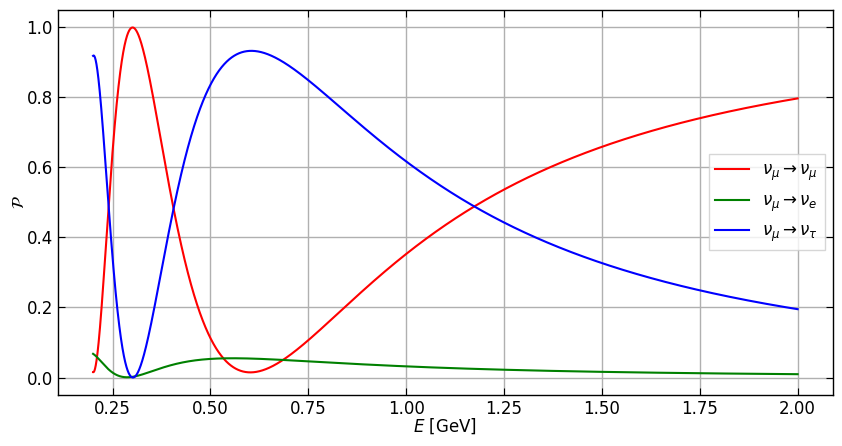

In [4]:
plt.plot(energy, mu2mu, color="red", label=r"$\nu_\mu\to\nu_\mu$")
plt.plot(energy, mu2e, color="green", label=r"$\nu_\mu\to\nu_e$")
plt.plot(energy, mu2tau, color="blue", label=r"$\nu_\mu\to\nu_\tau$")

plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\mathcal{P}$")
plt.legend()
plt.show()

<p> </p>

For long-baseline experiments there is a simple and accurate approximation of oscillation probability formula:
$$
\begin{equation}
    \mathcal{P}_{\mu\to e} (E,L) \simeq \sin^2 (2\,\theta_{13}) \sin^2{\theta_{23}} \sin^2\left(\frac{\Delta m ^2_{31} L}{4 E}\right)
    \label{for:probapprox1}
\end{equation}
$$
$$
\begin{equation}
    \mathcal{P}_{\mu\to \mu} (E,L) \simeq 1 - \sin^2 (2\,\theta_{23}) \cos^4{\theta_{13}}\sin^2\left(\frac{\Delta m ^2_{31} L}{4 E}\right)
\end{equation}
$$
    
These formula are used in definition of $\texttt{prob_vacuum_approx}$ function.

________________________

<h4>

**Comparison of exact and approximated formulae**

</h4>

Let's compare the validity of our approximations with the exact formulae. First, we plot the different oscillation probabilities as functions of the energy with T2K baseline $L$.

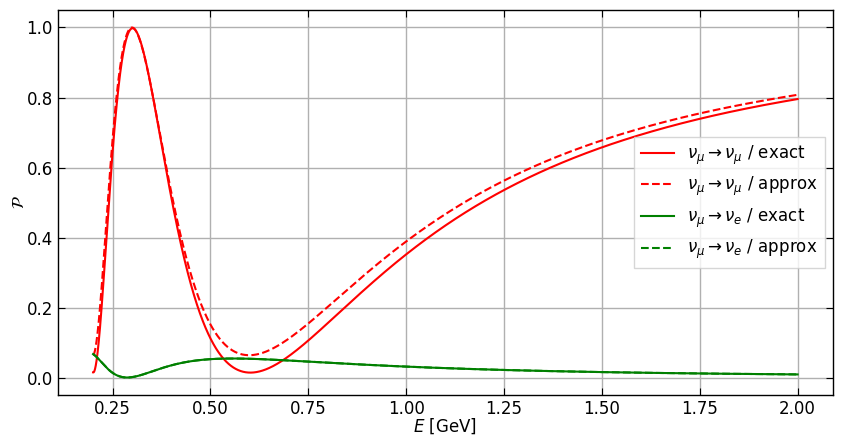

In [5]:
mu2e_approx = prob.probability_vacuum_approx(beta=0, E=energy)
mu2mu_approx = prob.probability_vacuum_approx(beta=1, E=energy)

plt.plot(energy, mu2mu, color="red", label=r"$\nu_\mu\to\nu_\mu$ / exact")
plt.plot(
    energy,
    mu2mu_approx,
    color="red",
    linestyle="dashed",
    label=r"$\nu_\mu\to\nu_\mu$ / approx",
)
plt.plot(energy, mu2e, color="green", label=r"$\nu_\mu\to\nu_e$ / exact")
plt.plot(
    energy, mu2e, color="green", linestyle="dashed", label=r"$\nu_\mu\to\nu_e$ / approx"
)
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\mathcal{P}$")
plt.legend()
plt.show()

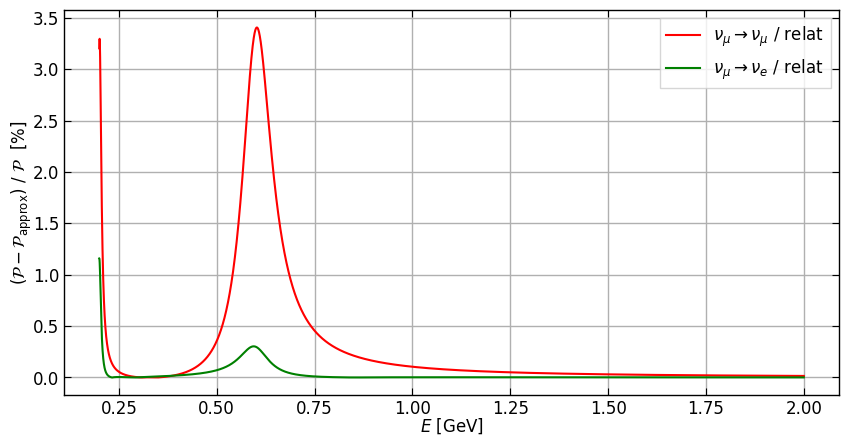

In [6]:
mu2mu_relat = np.abs((mu2mu - mu2mu_approx) / mu2mu)
mu2e_relat = np.abs((mu2e - mu2e_approx) / mu2mu)

plt.plot(energy, mu2mu_relat, color="red", label=r"$\nu_\mu\to\nu_\mu$ / relat")
plt.plot(energy, mu2e_relat, color="green", label=r"$\nu_\mu\to\nu_e$ / relat")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$(\mathcal{P}-\mathcal{P}_\text{approx}) \ / \ \mathcal{P} \ $ [%]")
plt.legend()
plt.show()

$\textbf{Example 3: Multiline plots in matplotlib}$

In [7]:
prob_mue_list = []
prob_mumu_list = []
prob_mumu2_list = []
energy_list = []
theta_13_list = np.linspace(8, 9, 50)
theta_23_list = np.linspace(45, 60, 50)
dm2_32_list = np.linspace(2e-3, 3e-3, 50)
for i in range(50):

    U = PMNS(theta_13=radians(theta_13_list[i]))
    prob_mue = probability_vacuum(U, beta=0, E=energy) * 100
    prob_mue_list.append(prob_mue)

    U = PMNS(theta_23=radians(theta_23_list[i]))
    prob_mumu = probability_vacuum(U, beta=1, E=energy) * 100
    prob_mumu_list.append(prob_mumu)

    U = PMNS()
    prob_mumu2 = probability_vacuum(U, beta=1, E=energy, dm2_32=dm2_32_list[i]) * 100
    prob_mumu2_list.append(prob_mumu2)
    energy_list.append(energy)


rc("figure", figsize=(32, 7))
fig, ax = plt.subplots(1, 3)

plt.axes(ax[0])

colors = np.arange(50)
lc = multiline(energy_list, prob_mumu2_list, dm2_32_list, cmap="RdYlGn", lw=2)
axcb = fig.colorbar(lc)
axcb.set_label(r"$\delta m^2_{32}, eV^2$")
plt.xlabel("E, GeV")
plt.ylabel("P, %")
plt.ylim(-10, 105)


plt.axes(ax[1])

plt.annotate(
    "",
    xy=(0.605, 101),
    xycoords="data",
    xytext=(0.605, 0),
    textcoords="data",
    verticalalignment="center",
    arrowprops=dict(
        arrowstyle="<|-|>, head_length=2, head_width=0.5", lw=2, facecolor="black"
    ),
)
plt.annotate(r"$\sim \sin^2(2\theta_{23})$", xy=(0.61, 75), fontsize=20)
plt.annotate(
    "",
    xy=(0.61, 0),
    xycoords="data",
    xytext=(0.302, 0),
    textcoords="data",
    verticalalignment="center",
    arrowprops=dict(
        arrowstyle="<|-|>, head_length=1, head_width=0.5", lw=2, facecolor="black"
    ),
)
plt.annotate(r"$\sim \Delta m^2_{13}$", xy=(0.30, -7), fontsize=20)
# plt.plot(energy, prob_mumu, color='green', label=r'Best fit values, $\theta_{23} = 49.2$')
plt.axvline(x=0.302, linestyle="--", ymin=0.09, ymax=0.95)
colors = np.arange(50)
lc = multiline(energy_list, prob_mumu_list, theta_23_list, cmap="RdYlGn", lw=2)
axcb = fig.colorbar(lc)
axcb.set_label(r"$\theta_{23}$, degrees")
plt.xlabel("E, GeV")
plt.ylabel("P, %")
plt.ylim(-10, 105)


plt.axes(ax[2])

plt.annotate(
    "",
    xy=(0.565, 6),
    xycoords="data",
    xytext=(0.565, -0.1),
    textcoords="data",
    verticalalignment="center",
    arrowprops=dict(
        arrowstyle="<|-|>, head_length=2, head_width=0.5", lw=2, facecolor="black"
    ),
)
plt.annotate(r"$\sim \sin^2(2\theta_{13})$", xy=(0.585, 1.5), fontsize=20)
colors = np.arange(50)
lc = multiline(energy_list, prob_mue_list, theta_13_list, cmap="RdYlGn", lw=2)
axcb = fig.colorbar(lc)
axcb.set_label(r"$\theta_{13}$, degrees")
plt.xlabel("E, GeV")
plt.ylabel("P, %")

NameError: name 'PMNS' is not defined

(0.15, 1.5)

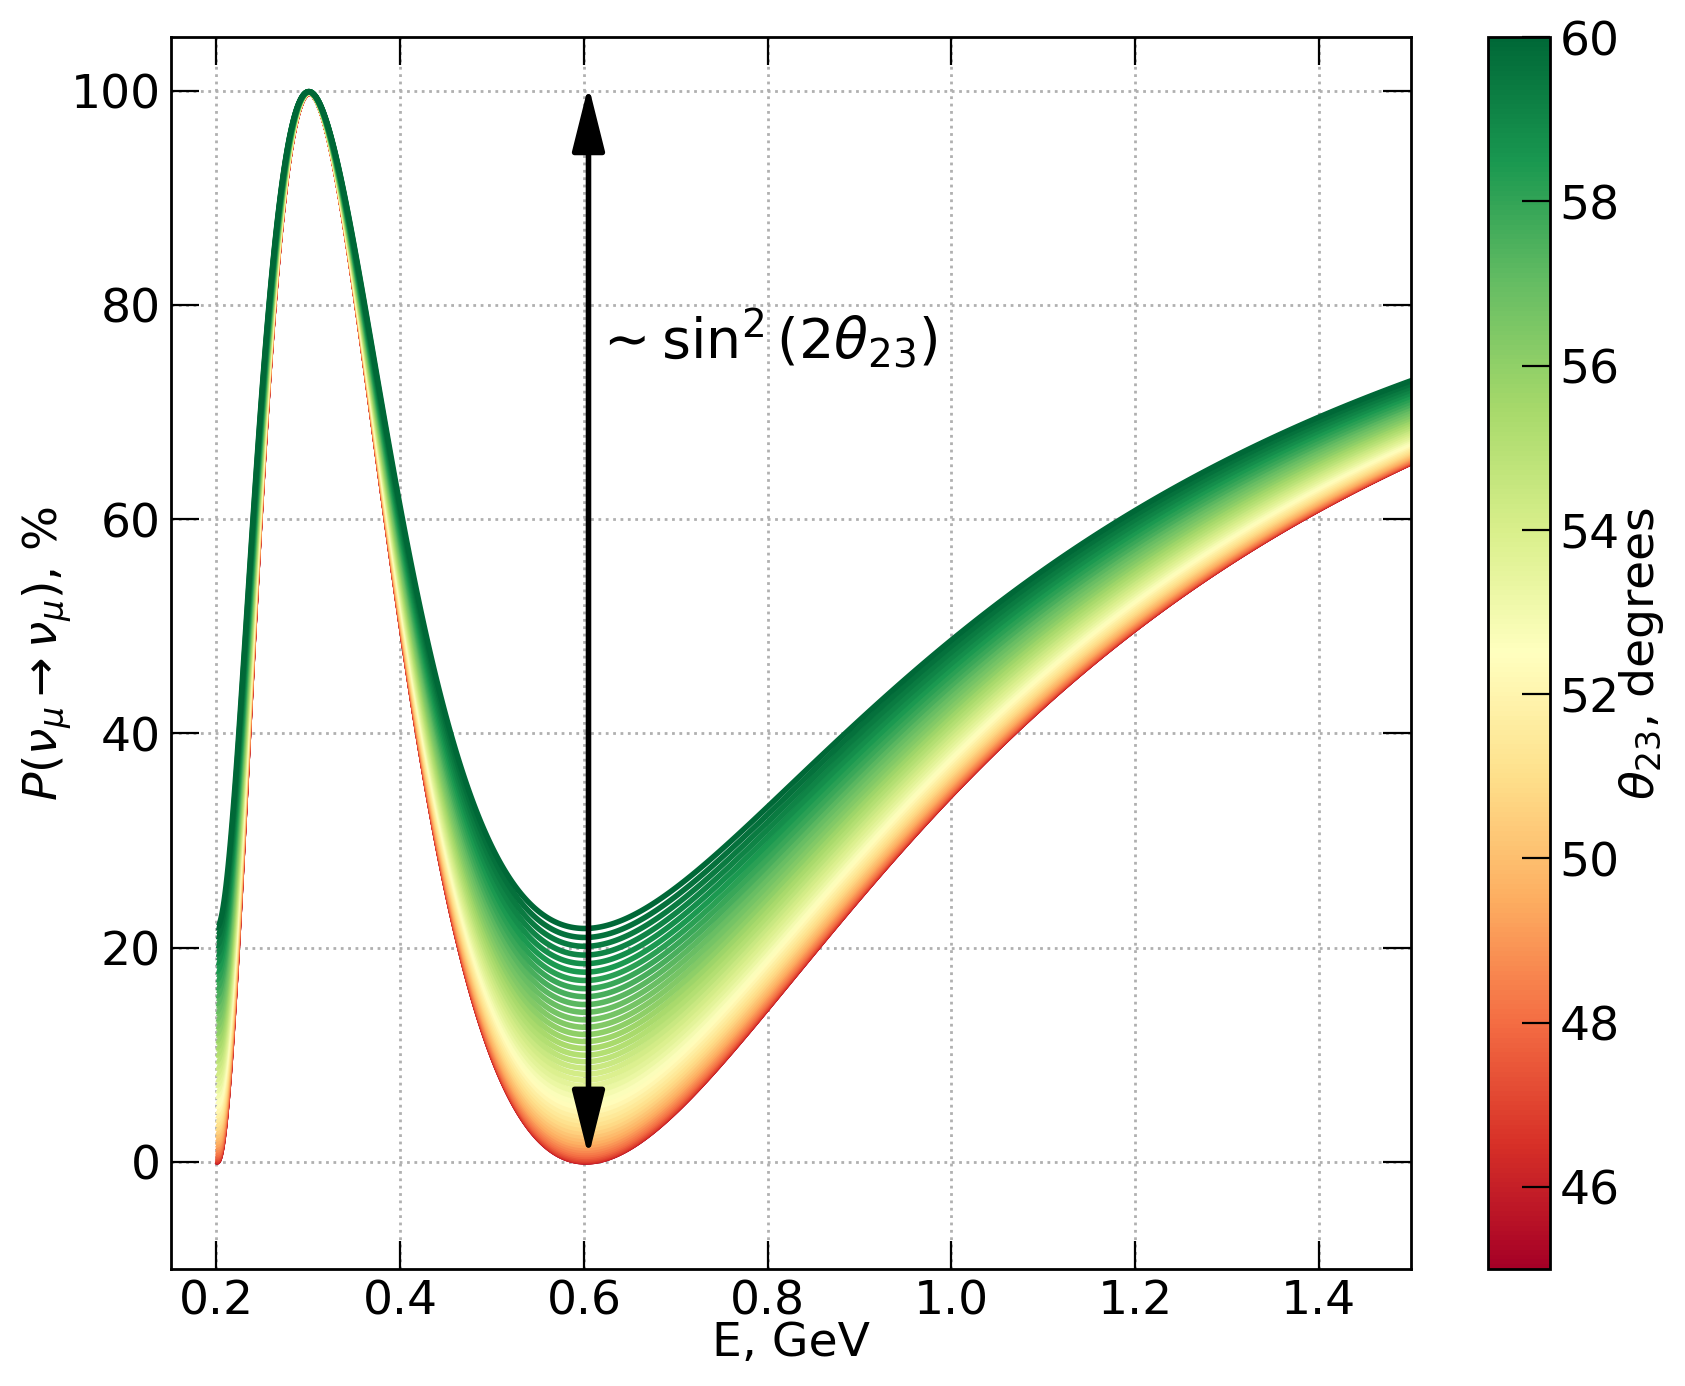

In [ ]:
rc("figure", figsize=(10, 8))

fig, ax = plt.subplots()

plt.annotate(
    "",
    xy=(0.605, 101),
    xycoords="data",
    xytext=(0.605, 0),
    textcoords="data",
    verticalalignment="center",
    arrowprops=dict(
        arrowstyle="<|-|>, head_length=2, head_width=0.5", lw=2, facecolor="black"
    ),
)
plt.annotate(r"$\sim \sin^2(2\theta_{23})$", xy=(0.61, 75), fontsize=20)
# plt.annotate('', xy=(0.61, 0),  xycoords='data',
# xytext=(0.302, 0), textcoords='data', verticalalignment="center",
# arrowprops=dict(arrowstyle='<|-|>, head_length=1, head_width=0.5',\
# lw=2, facecolor='black'))
# plt.annotate(r'$\sim \Delta m^2_{32}$', xy = (0.30, -7), fontsize=20)
# plt.plot(energy, prob_mumu, color='green', label=r'Best fit values, $\theta_{23} = 49.2$')
# plt.axvline(x=0.302,linestyle='--', ymin=0.09, ymax=0.95)

colors = np.arange(50)
lc = multiline(energy_list, prob_mumu_list, theta_23_list, cmap="RdYlGn", lw=2)
axcb = fig.colorbar(lc)
axcb.set_label(r"$\theta_{23}$, degrees")

plt.xlabel("E, GeV")
plt.ylabel(r"$P(\nu_\mu \rightarrow \nu_\mu)$, %")
plt.ylim(-10, 105)
plt.xlim(0.15, 1.5)

_______________________________
$D_{CP} := P(\nu_\alpha \xrightarrow[]{} \nu_\beta) - P(\bar{\nu}_\alpha \xrightarrow[]{} \bar{\nu}_\beta) = 16 J l_{12} l_{23} l_{31}$,

where J $\approx \sin 2\theta_{23} \sin 2\theta_{12} \sin \theta_{13} \sin \delta$

$\textbf{Example 4: Absolute CP-asymmetry in vaccuum}$

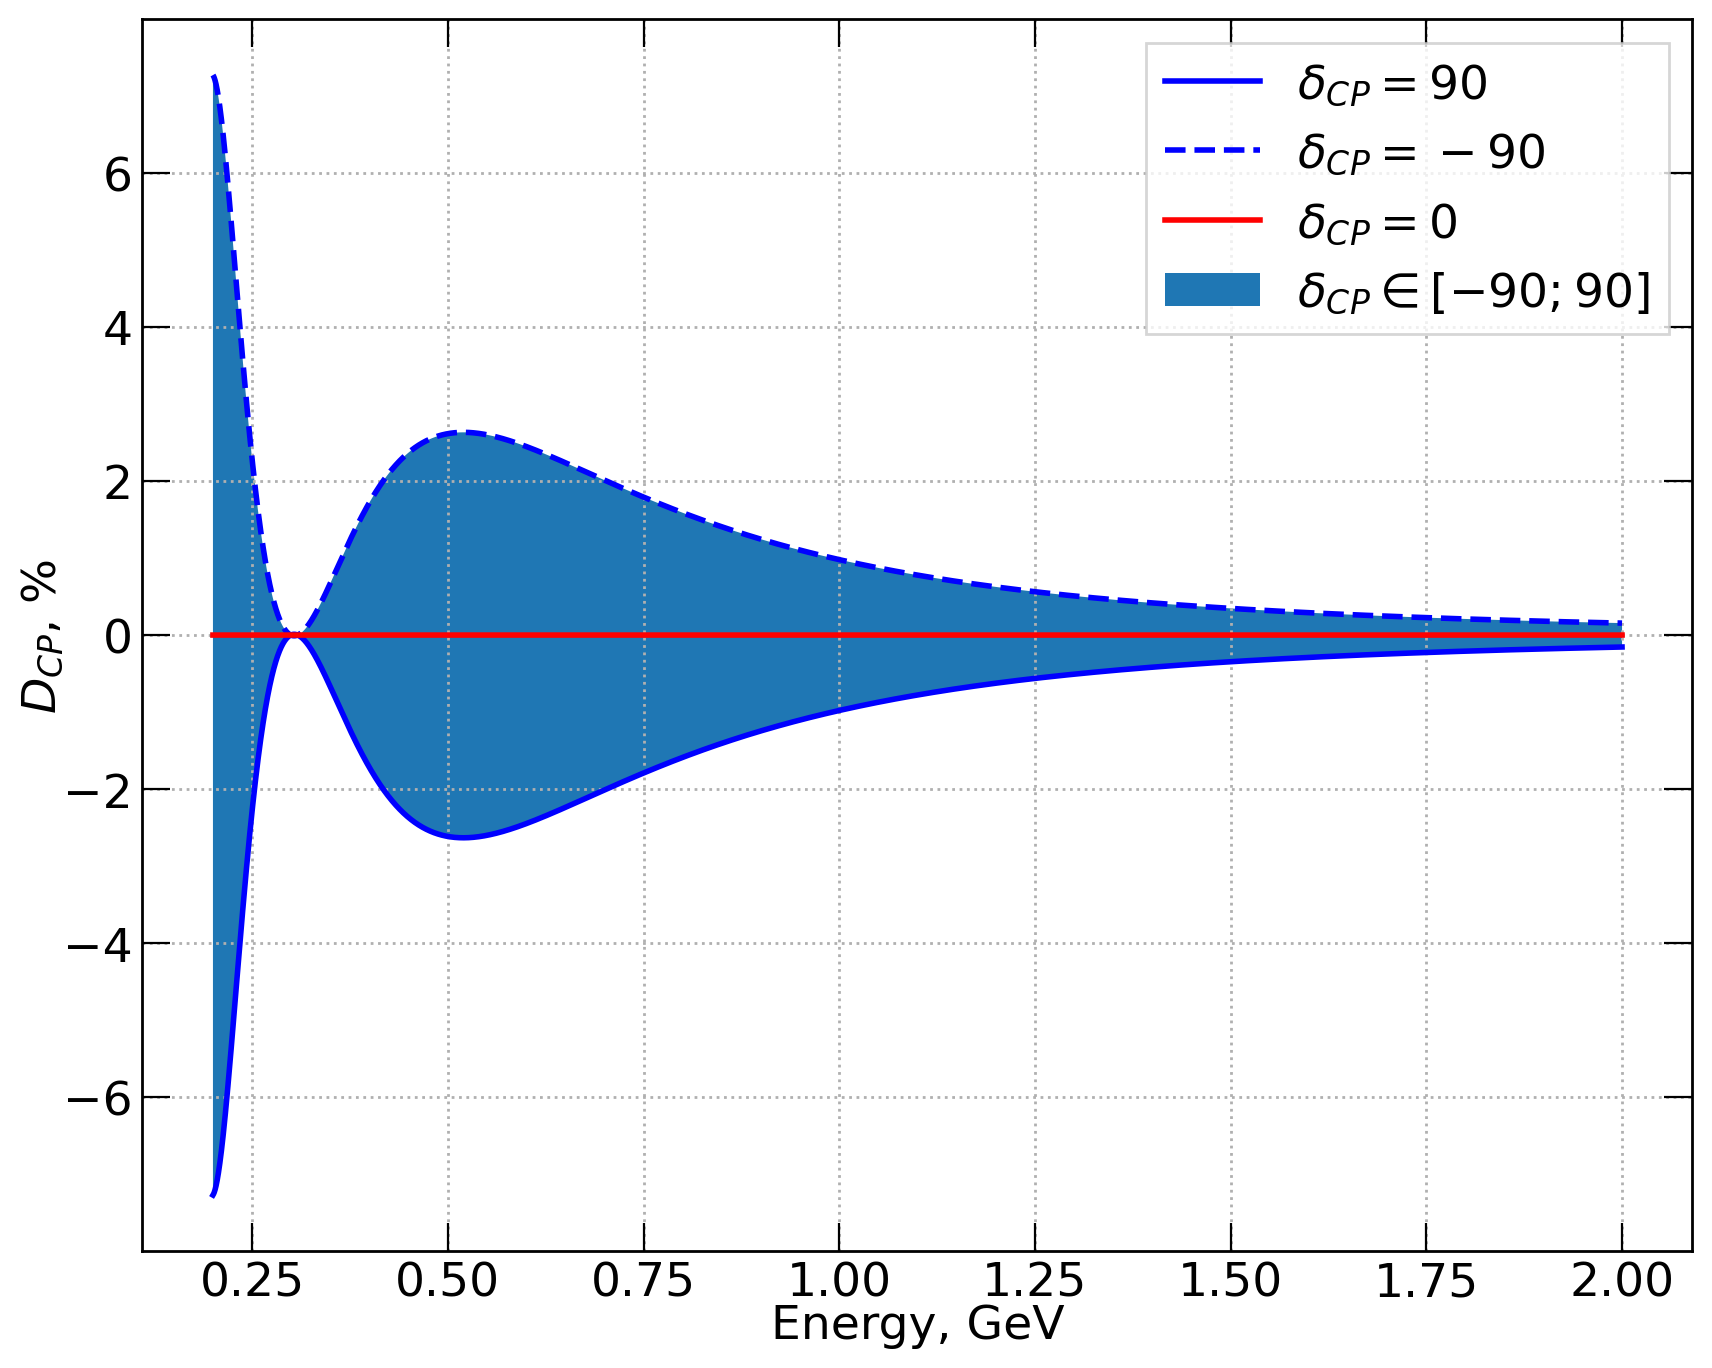

In [ ]:
rc("figure", figsize=(10, 8))


U = PMNS(delta_cp=radians(90))
prob_mue = probability_vacuum(U, beta=0, E=energy) * 100
prob_mue_anti = probability_vacuum_anti(U, beta=0, E=energy) * 100
Delta = prob_mue - prob_mue_anti

U = PMNS(delta_cp=radians(-90))
prob_mue2 = probability_vacuum(U, beta=0, E=energy) * 100
prob_mue_anti2 = probability_vacuum_anti(U, beta=0, E=energy) * 100
Delta2 = prob_mue2 - prob_mue_anti2

U = PMNS(delta_cp=radians(0))
prob_mue3 = probability_vacuum(U, beta=0, E=energy) * 100
prob_mue_anti3 = probability_vacuum_anti(U, beta=0, E=energy) * 100
Delta3 = prob_mue3 - prob_mue_anti3


fig, ax = plt.subplots()

plt.plot(energy, Delta, color="blue", label=r"$\delta_{CP}=90$")
plt.plot(energy, Delta2, color="blue", ls="--", label=r"$\delta_{CP}=-90$")
plt.plot(energy, Delta3, color="red", label=r"$\delta_{CP}=0$")

ax.fill_between(
    energy,
    Delta,
    Delta2,
    label=r"$\delta_{Cplt.annotate(r'$\sim \sin^2(2\theta_{23})$', xy = (0.61, 75), fontsize=20)P} \in [-90; 90]$",
)

plt.xlabel("Energy, GeV")
plt.ylabel(r"$D_{CP}$, %")
plt.legend()